In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import imp
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
#sys.path.append('/project2/rossby/group07/')
#pyqg=imp.load_source('__init__.py', '/project2/rossby/group07/pyqg_pip/')
#pyqg.QGModel=imp.load_source('QGModel.py', '/project2/rossby/group07/pyqg_pip/')
#pyqg=imp.find_module('__init__.py', '/project2/rossby/group07/pyqg_pip/')
#pyqg=imp.find_module('s', '/project2/rossby/group07/pyqg_pip/')

In [2]:
sys.path

['',
 '/project2/rossby/group07',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python27.zip',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/plat-linux2',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/lib-tk',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/lib-old',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/lib-dynload',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/site-packages',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/site-packages/Mako-1.0.7-py2.7.egg',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/site-packages/Sphinx-1.6.3-py2.7.egg',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/site-packages/Iris-1.13.0-py2.7.egg',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/site-packages/mmtf_python-1.0.2-py2.7.egg',
 '/software/Anaconda2-4.3.0-el7-x86_64/lib/python2.7/site-packages/IPython/extensions',
 '/home/t-970c07/.ipython']

In [17]:
#!export PYTHONPATH=/project2/rossby/group07
import pyqg_pip as pyqg
pyqg.__file__

'pyqg_pip/__init__.pyc'

In [18]:
year = 24*60*60*360.
m = pyqg.QGModel(beta=1.5e-11, rd=15000.0, delta=0.25, H1=500, U1=0.025, U2=0.0)
#m.run()

INFO:  Logger initialized
INFO:  Kernel initialized


In [19]:
# q_upper = m.q[0] + m.Qy[0]*m.y
# plt.contourf(m.x, m.y, q_upper, 12, cmap='RdBu_r')
# plt.xlabel('x'); plt.ylabel('y'); plt.title('Upper Layer PV')
# plt.colorbar();

In [20]:
imp.reload(pyqg)
year = 24*60*60*360.
m = pyqg.QGModel(    
        # grid size parameters
        nx=256,                     # grid resolution
        ny=256,
        L=16e6,                     # domain size is L [m]
        W=72e6,
        # timestepping parameters
        dt=7200.,                   # numerical timestep
        twrite=10000, # interval for cfl and ke writeout (in timesteps)
        tmax=10*year,           # total time of integration
        tavestart=5*year,       # start time for averaging
        taveint=86400.,             # time interval used for summation in longterm average in seconds
        #useAB2=False,               # use second order Adams Bashforth timestepping instead of 3rd
        
        # friction parameters
        rek=5.787e-7,               # linear drag in lower layer
        filterfac=23.6,             # the factor for use in the exponential filter
        # constants
        #f = None,                   # coriolis parameter (not necessary for two-layer model
                                    #  if deformation radius is provided)
        g= 9.81,                    # acceleration due to gravity
        
        
        # diagnostics parameters
        diagnostics_list='all',     # which diagnostics to output
        # fft parameters
        # removed because fftw is now manditory
        #use_fftw = False,               # fftw flag
        #teststyle = False,            # use fftw with "estimate" planner to get reproducibility
        ntd = 1,                       # number of threads to use in fftw computations
        #log_level = 1,                 # logger level: from 0 for quiet (no log) to 4 for verbose
        #                               #     logger (see  https://docs.python.org/2/library/logging.html)
        logfile = None,                # logfile; None prints to screen
        
        
        beta=1.6e-11,               # gradient of coriolis parameter
        # in Naburos model: delta = 4.4e-18  !linear devrease in beta (1/(s*m*m))
    
        #rek=5.787e-7,               # linear drag in lower layer
        rd=15000.0,                 # deformation radius
        delta=0.25,                 # layer thickness ratio (H1/H2)
        H1 = 500,                   # depth of layer 1 (H1)
        #U1=0.025,                   # upper layer flow
        U2=0.0,                     # lower layer flow
        )

INFO:  Logger initialized
INFO:  Kernel initialized


In [21]:
pyqg.__file__

'pyqg_pip/__init__.pyc'

In [30]:
xx, yy= np.meshgrid(m.q[0,:,:].shape[0], m.q[0,:,:].shape[1])

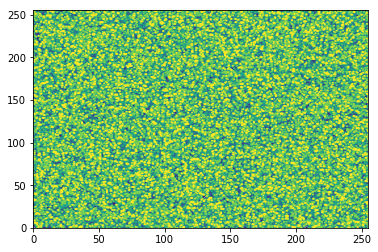

In [26]:
plt.contour(m.q[0,:,:])

In [17]:
m.run()

INFO: Step: 10000, Time: 7.20e+07, KE: 3.81e-04, CFL: 0.082
INFO: Step: 20000, Time: 1.44e+08, KE: 4.88e-04, CFL: 0.086
INFO: Step: 30000, Time: 2.16e+08, KE: 4.64e-04, CFL: 0.082
INFO: Step: 40000, Time: 2.88e+08, KE: 5.19e-04, CFL: 0.096


/project2/rossby/group07/.conda/lib/python2.7/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


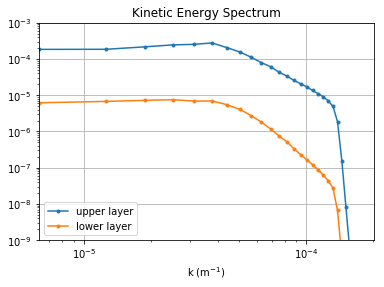

In [12]:
kespec_u = m.get_diagnostic('KEspec')[0].sum(axis=0)
kespec_l = m.get_diagnostic('KEspec')[1].sum(axis=0)
plt.loglog( m.kk, kespec_u, '.-' )
plt.loglog( m.kk, kespec_l, '.-' )
plt.legend(['upper layer','lower layer'], loc='lower left')
plt.ylim([1e-9,1e-3]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum');